In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
import pickle
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

## ***Loading Dataset....***

In [ ]:
df = pd.read_csv('preprocessed_data')
df

,deceptive,text
0,1,actual book reserv hotel phone got great rate ...
1,1,one worst travel experi quit time arriv constr...
2,0,husband visit hotel way home honeymoon nice ho...
3,0,omni chicago hotel delight stay second step pl...
4,1,stay friend long weekend august love hotel enj...
...,...,...
1595,1,stay hotel one night hotel excel compar qualit...
1596,0,stay knickerbock hotel last time visit chicago...
1597,0,hyatt regenc chicago hotel perfecti locat cent...
1598,0,stay millennium knickerbock hotel chicago stan...


In [ ]:
from sklearn.model_selection import train_test_split
#Spliting data into training and testing

#random_state: shuffles the data while splitting
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], random_state=5)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1600
Number of rows in the training set: 1200
Number of rows in the test set: 400


In [ ]:
X_train, X_test, y_train, y_test

(1280    got outstand rate sign hotel websit newslett a...
 376     stay night anniversari desk clerk great sinc a...
 1545    husband stay new year eve weekend excel hotel ...
 544     ambassador east hotel locat downtown chicago o...
 909     amalfi hotel becom absolut favorit place stay ...
                               ...                        
 1424    stay valentin weekend got 5th floor direct vie...
 1142    husband sore disappoint hotel request non smok...
 998     wife stay allegro weekend busi trip impress ho...
 206     swissotel chicago let shini bright light windi...
 867     great hotel went see museum contemporari art g...
 Name: text, Length: 1200, dtype: object,
 1510    husband stay hard rock hotel chicago month bac...
 209     amalfi hotel chicago advertis famili friend ye...
 425     decid spend extra money book room monaco websi...
 982     wife recent stay hotel fun anniversari weekend...
 619     stay sheraton confer attend held plus side hot...
              

In [ ]:
yt= y_test
xt= X_train

In [ ]:
vec= pickle.load(open('vectorizer.pkl',"rb"))
vec

#with open('vectorizer.pkl', 'rb') as f:
#    vec = pickle.load(f)

TfidfVectorizer()

In [ ]:
training_data = vec.fit_transform(X_train)
testing_data = vec.transform(X_test)
print(testing_data)
#training_data.shape

  (0, 293)	0.13317850726565786
  (0, 309)	0.1415701475307671
  (0, 348)	0.20941946797158398
  (0, 389)	0.12657415026999527
  (0, 819)	0.11630328002590733
  (0, 836)	0.0744978847295973
  (0, 878)	0.14397733488815168
  (0, 899)	0.20742429834183373
  (0, 1199)	0.17236868785648854
  (0, 1317)	0.12249307536370825
  (0, 1575)	0.21366650838700124
  (0, 1991)	0.13018096893506664
  (0, 2154)	0.10383955079334674
  (0, 2236)	0.17000461545619786
  (0, 2360)	0.05724312976076182
  (0, 2393)	0.16153131054295963
  (0, 2442)	0.18136478992809815
  (0, 3124)	0.23557886143667067
  (0, 3485)	0.24713940817275248
  (0, 3831)	0.18136478992809815
  (0, 3856)	0.2171073615429423
  (0, 4091)	0.20365854117380253
  (0, 4107)	0.05811725789307146
  (0, 4130)	0.16954495699987465
  (0, 4281)	0.09838927409750803
  :	:
  (399, 2913)	0.07899332662346632
  (399, 2994)	0.1158221989440327
  (399, 3223)	0.07885179222034103
  (399, 3233)	0.07734001221794089
  (399, 3243)	0.057969717927348154
  (399, 3342)	0.10580344332352211
 

##1. Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(training_data, y_train)

SVC()

In [ ]:
svc_predictions = svc.predict(testing_data)

In [ ]:
svc_predictions

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
svcaccuracy = accuracy_score(y_test,svc_predictions)
print('Accuracy score: ', format(accuracy_score(y_test,svc_predictions)))
print('Precision score: ', format(precision_score(y_test,svc_predictions)))
print('Recall score: ', format(recall_score(y_test, svc_predictions)))
print('F1 score: ', format(f1_score(y_test, svc_predictions)))

Accuracy score:  0.905
Precision score:  0.9033816425120773
Recall score:  0.9121951219512195
F1 score:  0.9077669902912622


##2. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(training_data, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_predictions = knn.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score
knnaccuracy = accuracy_score(knn_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(knn_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,knn_predictions)))
print('Recall score: ', format(recall_score(y_test, knn_predictions)))
print('F1 score: ', format(f1_score(y_test, knn_predictions)))

Accuracy score:  0.79
Precision score:  0.8853503184713376
Recall score:  0.6780487804878049
F1 score:  0.7679558011049724


##3. Descision Tree Classifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 4)
training_data1 = training_data.toarray()
dtree_model.fit(training_data1, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
dtree_predictions = dtree_model.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(dtree_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(dtree_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,dtree_predictions)))
print('Recall score: ', format(recall_score(y_test, dtree_predictions)))
print('F1 score: ', format(f1_score(y_test, dtree_predictions)))

Accuracy score:  0.6475
Precision score:  0.6927710843373494
Recall score:  0.5609756097560976
F1 score:  0.6199460916442049


##4. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(training_data, y_train)

LogisticRegression()

In [ ]:
lrpredicted = lr.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(lrpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(lrpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,lrpredicted)))
print('Recall score: ', format(recall_score(y_test, lrpredicted)))
print('F1 score: ', format(f1_score(y_test, lrpredicted)))

Accuracy score:  0.9
Precision score:  0.8947368421052632
Recall score:  0.9121951219512195
F1 score:  0.9033816425120773


## Comparison of all Algorithms

In [ ]:

print('Decision tree:',dtree_accuracy)
print('Support Vector Classifier:',svcaccuracy)
print('K-Nearest Neighbour:',knnaccuracy)
print('LogisticRegression:',lr_accuracy)

Decision tree: 0.6475
Support Vector Classifier: 0.905
K-Nearest Neighbour: 0.79
LogisticRegression: 0.9


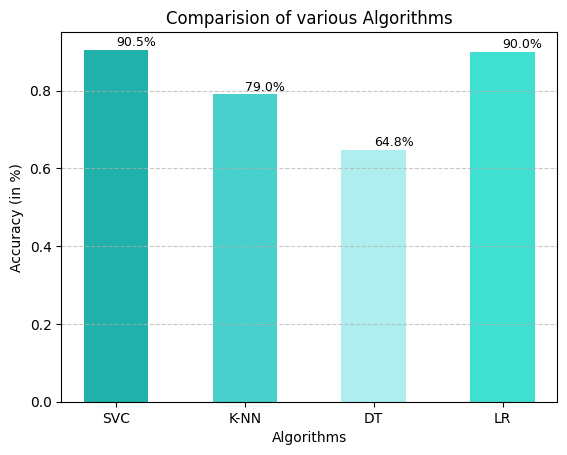

In [ ]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4]


height = [svcaccuracy, knnaccuracy, dtree_accuracy,  lr_accuracy]

# labels for bars
tick_label = ['SVC', 'K-NN','DT','LR']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.5, color = ['lightseagreen','mediumturquoise','paleturquoise','turquoise'])

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(height):
    plt.text(left[i], value + 0.01, f'{(value*100):.1f}%', fontsize=9)



# naming the x-axis
plt.xlabel('Algorithms')
# naming the y-axis
plt.ylabel('Accuracy (in %)')
# plot title
plt.title('Comparision of various Algorithms')

# function to show the plot
plt.show()

# Confusion Matrix


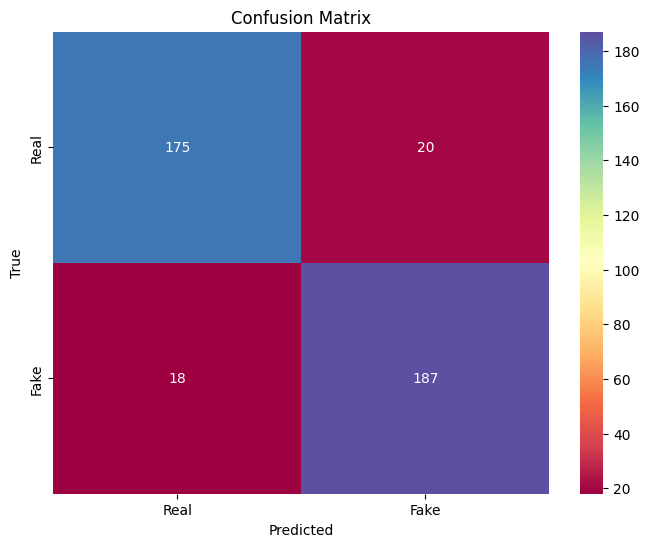

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, svc_predictions)

# Plot confusion matrix using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **Precision-Recall Curve**

In [ ]:
pred_svm= svc.decision_function(testing_data)

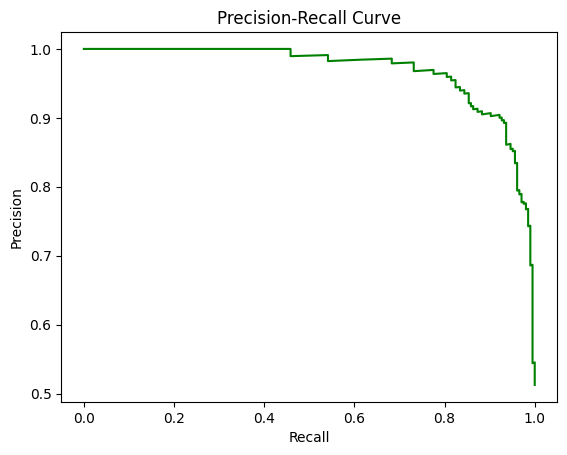

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pred_svm)

# Plot Precision-Recall curve
plt.plot(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
data = vec.transform(df['text'])

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(training_data, y_train)

SVC()

In [ ]:
svc_predictions = svc.predict(data)

In [ ]:
svc_predictions

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
len(svc_predictions)

1600

In [ ]:
df['Predictions']=svc_predictions

In [ ]:
df.head(50)

,deceptive,text,Predictions
0,1,actual book reserv hotel phone got great rate ...,1
1,1,one worst travel experi quit time arriv constr...,1
2,0,husband visit hotel way home honeymoon nice ho...,0
3,0,omni chicago hotel delight stay second step pl...,0
4,1,stay friend long weekend august love hotel enj...,1
5,1,book hotel direct hotel websit arriv tire irel...,1
6,0,hard rock hotel chicago promis upscal accommod...,0
7,0,hotel great love interior design room custom s...,0
8,0,recent stay amalfi hotel chicago disappoint ri...,0
9,0,stun bay chicago find equal ambassador east ho...,0


In [ ]:
df.loc[df["Predictions"] == 1, "Predictions"] = "TRUE"
df.loc[df["Predictions"] == 0, "Predictions"] = "FALSE"

<ipython-input-229-0d4becc478c0>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TRUE' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Predictions"] == 1, "Predictions"] = "TRUE"


In [ ]:
df.head(60)

,deceptive,text,Predictions
0,1,actual book reserv hotel phone got great rate ...,TRUE
1,1,one worst travel experi quit time arriv constr...,TRUE
2,0,husband visit hotel way home honeymoon nice ho...,FALSE
3,0,omni chicago hotel delight stay second step pl...,FALSE
4,1,stay friend long weekend august love hotel enj...,TRUE
5,1,book hotel direct hotel websit arriv tire irel...,TRUE
6,0,hard rock hotel chicago promis upscal accommod...,FALSE
7,0,hotel great love interior design room custom s...,FALSE
8,0,recent stay amalfi hotel chicago disappoint ri...,FALSE
9,0,stun bay chicago find equal ambassador east ho...,FALSE


In [ ]:
df[df['Predictions']== 'FALSE']

,deceptive,text,Predictions
2,0,husband visit hotel way home honeymoon nice ho...,FALSE
3,0,omni chicago hotel delight stay second step pl...,FALSE
6,0,hard rock hotel chicago promis upscal accommod...,FALSE
7,0,hotel great love interior design room custom s...,FALSE
8,0,recent stay amalfi hotel chicago disappoint ri...,FALSE
...,...,...,...
1590,0,stay swissotel chicago experienc worst custom ...,FALSE
1591,0,hotel give lot reason price great downtown loc...,FALSE
1596,0,stay knickerbock hotel last time visit chicago...,FALSE
1597,0,hyatt regenc chicago hotel perfecti locat cent...,FALSE


In [ ]:
index_def= df[df['Predictions']== 'FALSE'].index
index_def

Index([   2,    3,    6,    7,    8,    9,   11,   12,   13,   15,
       ...
       1584, 1585, 1587, 1588, 1589, 1590, 1591, 1596, 1597, 1598],
      dtype='int64', length=798)

In [ ]:
final=df.drop(index= index_def)


In [ ]:
#final is the table with all fake reviews deleted
final.head(60)

,deceptive,text,Predictions
0,1,actual book reserv hotel phone got great rate ...,TRUE
1,1,one worst travel experi quit time arriv constr...,TRUE
4,1,stay friend long weekend august love hotel enj...,TRUE
5,1,book hotel direct hotel websit arriv tire irel...,TRUE
10,1,hotel reserv anoth hotel set read negat review...,TRUE
14,1,visit birthday never chicago sure stay found d...,TRUE
17,1,slate two night chicago june could onyl get in...,TRUE
19,1,friend high recommend hotel happier wonder hus...,TRUE
22,1,hotel perfect locat downtown chicago shop thin...,TRUE
23,0,let prefac say absolut love stay hotel chose l...,TRUE


In [ ]:
vector= pickle.load(open('vectorizer.pkl',"rb"))
trai= vector.transform(xt)
trai.shape

(1200, 5559)

In [ ]:
from sklearn.svm import SVC
model= SVC(kernel='rbf', probability=True)
model.fit(trai, y_train)
pickle.dump(model, open('svcmodel.pkl', 'wb'))

In [ ]:
svc= pickle.load(open('svcmodel.pkl',"rb"))

In [ ]:
import pickle
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# Load vectorizer and transform data
vector = pickle.load(open('vectorizer.pkl', "rb"))
trai = vector.transform(xt)

# Create and train the SVC model with probability=True
model = SVC(kernel='rbf', probability=True)
model.fit(trai, y_train)

# Save the model
pickle.dump(model, open('svcmodel.pkl', 'wb'))


In [ ]:
def clean_desc(desc):
    clean_1 = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
    clean_2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

    desc = [clean_1.sub("", line.lower()) for line in desc]
    desc = [clean_2.sub(" ", line) for line in desc]
    return desc

In [ ]:
dm= pickle.load(open('vectorizer.pkl',"rb"))
revie='The Allegro in downtown Chicago is a great stay/ part of the Kimpton Group boutique hotels the Allegro offers a classy stay in a beautiful room for a moterate price/ they offer complimentary and decent wine gratis in the late afternoon and the hotel allows you access to everything the loop has to offer in this remarkable city'
df_inp= pd.DataFrame({ 'text': [revie]})
revie = clean_desc(df_inp['text'])
da=dm.transform(revie)
da.shape

(1, 5559)

In [ ]:
run= pickle.load(open("svcmodel.pkl", "rb"))
run
run.predict(da)

array([1])